# Aaronson & Arkhipov response

In [1]:
using BosonSampling
import StatsBase: Weights, sample
using Plots

┌ Info: Precompiling BosonSampling [ede64b7e-1611-462e-b6a2-e80f9d77add9]
└ @ Base loading.jl:1278
┌ Warning: Package BosonSampling does not have RandomMatrices in its dependencies:
│ - If you have BosonSampling checked out for development and have
│   added RandomMatrices as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with BosonSampling
└ Loading RandomMatrices into BosonSampling from project dependency, future warnings for BosonSampling are suppressed.


In [2]:
function bosonsampling_distribution(mat)
    _, n::Int64 = size(mat)
    @assert n == 9
    lista::Array{Array{Int,1},1} = Array{Int,1}[]
    proba::Array{Float64,1} = Float64[]
    for i in 1:9, j in 1:9, k in 1:9
        pp = abs( per( mat[[i,j,k], 1:3] ) )^2
        push!(proba, pp/(*(factorial.([i,j,k])...)))
        push!(lista, [i,j,k])
    end
    lista, proba
end

bosonsampling_distribution (generic function with 1 method)

In [3]:
function classicalmocking_distribution(m)
    _, n::Int64 = size(m)
    mat = zeros(Float64, n,n)
    mat .= abs2.(m)
    @assert n == 9
    lista::Array{Array{Int,1},1} = Array{Int,1}[]
    proba::Array{Float64,1} = Float64[]
    for i in 1:9, j in 1:9, k in 1:9
        pp = abs( per( mat[[i,j,k], 1:3] ) )^2
        push!(proba, pp/(*(factorial.([i,j,k])...)))
        push!(lista, [i,j,k])
    end
    lista, proba
end

classicalmocking_distribution (generic function with 1 method)

In [4]:
function pestimator(mat, n, filas)
    #tmp = mat[1:n, filas]
    tmp = mat[filas, 1:n]
    total::Float64 = 0.0
    prod::Float64 = 1.0
    for i in 1:n
        total = 0.0
        for j in 1:n
            total += abs(tmp[i,j])^2
        end
        prod *= total
    end
    prod    
end

pestimator (generic function with 1 method)

In [15]:
mat = rand(Haar(2), 9);

output, proba = bosonsampling_distribution(mat);

In [16]:
mat = rand(Haar(2), 9);

output2, proba2 = classicalmocking_distribution(mat);

In [17]:
bosonsampling = Int64[0]
for i in 1:10^3
    tmp = pestimator(mat,3,sample(output, Weights(proba)))
    if tmp > (3/9)^3
        #bosonsampling += 1
        push!(bosonsampling, bosonsampling[end] + 1)
    else
        #bosonsampling -= 1
        push!(bosonsampling, bosonsampling[end] - 1)
    end
end

In [18]:
mockclass = Int64[0]
for i in 1:10^3
    tmp = pestimator(mat,3,sample(output2, Weights(proba2)))
    if tmp > (3/9)^3
        #mockclass += 1
        push!(mockclass, mockclass[end] + 1)
    else
        #mockclass -= 1
        push!(mockclass, mockclass[end] - 1)
    end
end

In [19]:
uniformsampling = Int64[0]
for i in 1:10^3
    tmp = pestimator(mat,3,output[rand(1:729)])
    if tmp > (3/9)^3
        #uniformsampling += 1
        push!(uniformsampling, uniformsampling[end] + 1)
    else
        #uniformsampling -= 1
        push!(uniformsampling, uniformsampling[end] - 1)
    end
end

Here we can see the plots corresponding to uniform and boson sampling.

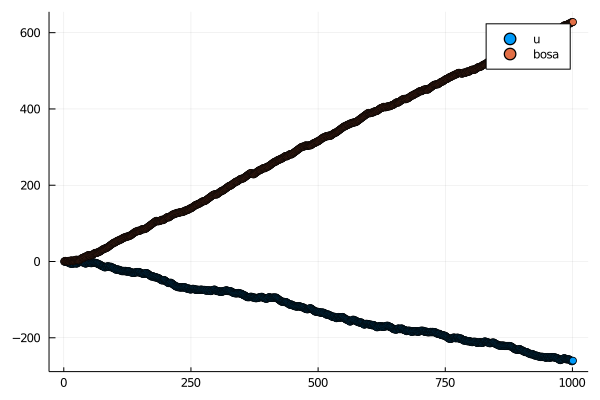

In [20]:
scatter([uniformsampling bosonsampling], label = ["uniform" "bosa"])

Now, we compare the bosonsampling distribution against a distribution proposed by A&A.This new distribution can be efficiently sample but the test is not able to distinguish one from the other.

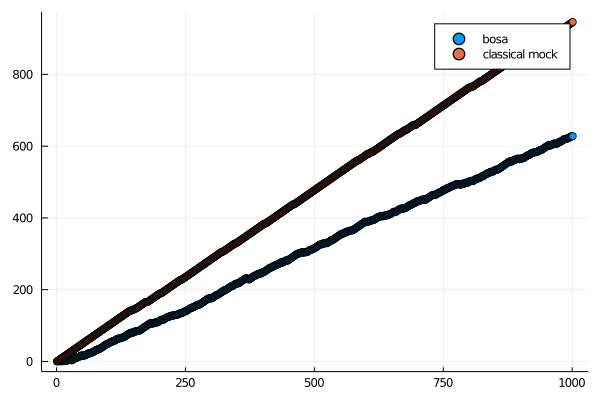

In [22]:
scatter([bosonsampling mockclass], label = ["bosa" "classical mock"])